# Linear Regression (Tensorflow)
## Chapter 5
### Predictive Analytics for the Modern Enterprise

The notebook has been tested using the following pre-requisite:

* Python V3.9.13 - https://www.python.org/
* Tensorflow V2.11.0 
* Keras V2.11.0
* Jupyter - V6.4.12 - https://jupyter.org/
* Desktop computer - macOS Ventura V13.1

In [1]:
import numpy as np #Pre-processing                 
import pandas as pd #Pre-processing
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization

import tensorflow as tflow #Predictive Analytics
from tensorflow import keras #Modeling and Predicting
from tensorflow.keras import layers #Model Building

from pandas import options, read_csv #Data import

2023-02-24 19:26:23.522047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dataset sourced from: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [2]:
local_ds = '../Datasets/Real estate.csv' #Replace this with where you uncompressed the dataset
local_ds = read_csv(local_ds)
local_ds

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
k_dataset = local_ds.copy()
k_dataset.pop('No')
k_dataset.pop('X1 transaction date')
k_dataset.pop('X5 latitude')
k_dataset.pop('X6 longitude')
k_dataset

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


In [4]:
k_training_ds = k_dataset.sample(frac=0.8, random_state=0) #Create training dataset as 80% of whole dataset
k_testing_ds = k_dataset.drop(k_training_ds.index) #Create test dataset by dropping training dataset indexes from whole dataset

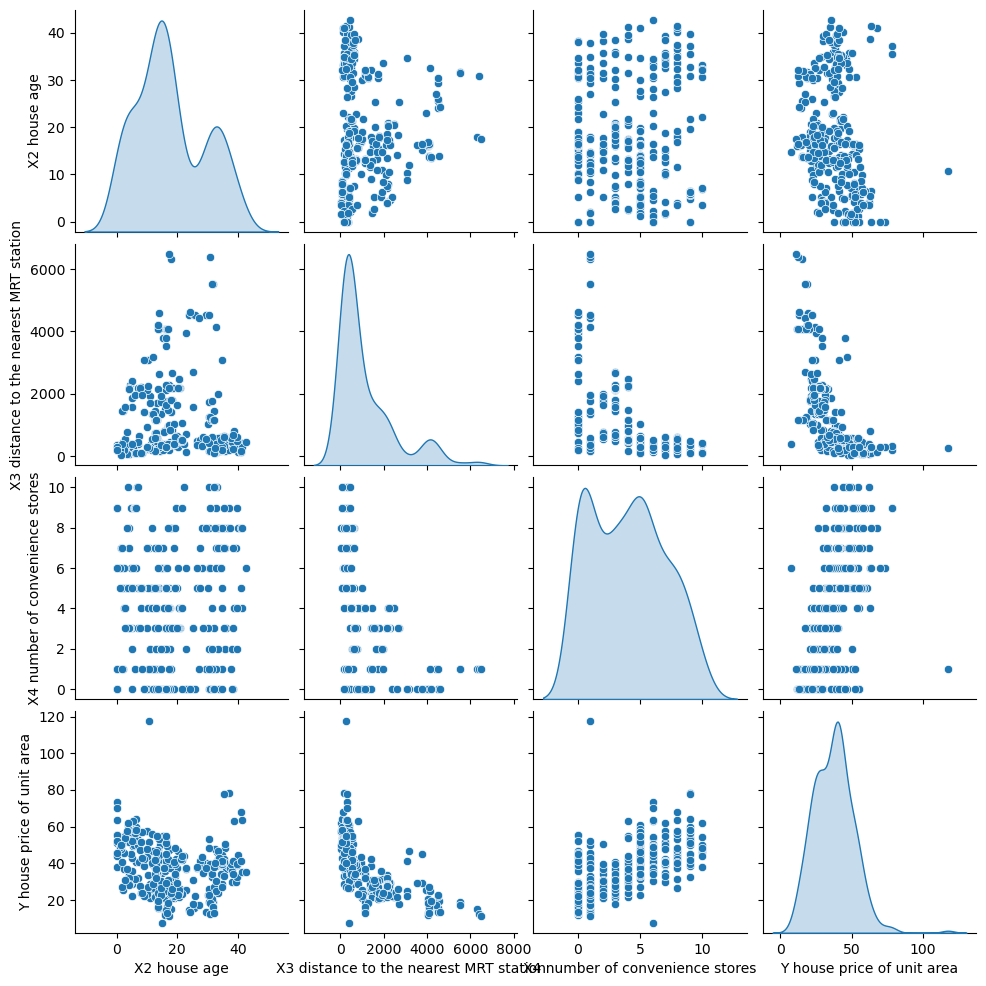

In [5]:
%matplotlib inline
sns.pairplot(k_training_ds, diag_kind='kde')

In [6]:
k_training_ds.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000
mean,17.652266,1154.274016,3.996979,37.361329
std,11.305017,1319.156009,2.964945,13.763673
min,0.000000,23.382840,0.000000,7.600000
25%,9.950000,289.324800,1.000000,26.950000
50%,16.100000,515.112200,4.000000,37.900000
75%,27.550000,1604.902500,6.000000,45.500000
max,42.700000,6488.021000,10.000000,117.500000


In [7]:
k_training_ds = k_training_ds.copy() #Copy of the data
k_testing_ds = k_testing_ds.copy() #Copy of the data 

k_train_predict = k_training_ds.pop('Y house price of unit area') #Separate the features and labels (predictors and predicted)
k_test_predict = k_testing_ds.pop('Y house price of unit area') #Separate the features and labels (predictors and predicted)

In [8]:
k_training_ds.describe().transpose()[['mean', 'std']]

,mean,std
X2 house age,17.652266,11.305017
X3 distance to the nearest MRT station,1154.274016,1319.156009
X4 number of convenience stores,3.996979,2.964945


### What is normalization ?/?

Normalization is a data preparation technique that is frequently used in machine learning. The process of transforming the columns in a dataset to the same scale is referred to as normalization. Every dataset does not need to be normalized for machine learning. It is only required when the ranges of characteristics are different.

Consider a data collection that includes two characteristics: age and income. Where the age spans from 0 to 80 years old, and the income extends from 0 to 80,000 dollars and up. Income is roughly 1,000 times that of age. As a result, the ranges of these two characteristics are vastly different.

Because of its bigger value, the attributed income will organically influence the conclusion more when we undertake further analysis, such as multivariate linear regression. However, this does not necessarily imply that it is a better predictor. As a result, we normalize the data so that all of the variables are in the same range.

We normalize training data to solve the model learning challenge. We make sure that the various features have similar value ranges (feature scaling) so that gradient descents can converge faster.


---


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the Working with preprocessing layers guide and the Classify structured data using Keras preprocessing layers tutorial.

In [9]:
normalizer = tflow.keras.layers.Normalization(axis=-1) #A preprocessing layer which normalizes continuous features 

This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling (input - mean) / sqrt(var) at runtime.

axis - Integer, tuple of integers, or None. The axis or axes that should have a separate mean and variance for each index in the shape. For example, if shape is (None, 5) and axis=1, the layer will track 5 separate mean and variance values for the last axis. If axis is set to None, the layer will normalize all elements in the input by a scalar mean and variance. Defaults to -1, where the last axis of the input is assumed to be a feature dimension and is normalized per index. Note that in the specific case of batched scalar inputs where the only axis is the batch axis, the default will normalize each index in the batch separately. In this case, consider passing axis=None.

In [10]:
normalizer.adapt(np.array(k_training_ds))

2023-02-24 19:26:30.170659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Computes the mean and variance of values in a dataset.

In [11]:
print(normalizer.mean)

tf.Tensor([[  17.652266  1154.2739       3.9969788]], shape=(1, 3), dtype=float32)


In [12]:
print('Original: ', np.array(k_training_ds[0:9]))
print('\nNormalized: ', normalizer(np.array(k_training_ds[0:9])).numpy())

Original:  [[1.030000e+01 2.114473e+02 1.000000e+00]
 [2.400000e+01 4.527687e+03 0.000000e+00]
 [3.450000e+01 3.249419e+02 6.000000e+00]
 [2.560000e+01 4.519690e+03 0.000000e+00]
 [1.440000e+01 1.699803e+02 1.000000e+00]
 [3.660000e+01 4.888193e+02 8.000000e+00]
 [3.580000e+01 1.707311e+02 7.000000e+00]
 [3.480000e+01 4.052134e+02 1.000000e+00]
 [1.050000e+01 2.791726e+02 7.000000e+00]]

Normalized:  [[-0.6513389  -0.71580166 -1.0123346 ]
 [ 0.56234723  2.5611227  -1.3501196 ]
 [ 1.4925447  -0.62963563  0.67659056]
 [ 0.70409167  2.5550513  -1.3501196 ]
 [-0.288119   -0.74728376 -1.0123346 ]
 [ 1.678584   -0.50521857  1.3521606 ]
 [ 1.6077119  -0.74671376  1.0143756 ]
 [ 1.5191216  -0.56869286 -1.0123346 ]
 [-0.63362086 -0.66438407  1.0143756 ]]


input_shape=[1,] = we are passing only 1 features so input tensor has a shape 1,

units = 1 - Positive integer, dimensionality of the output space.

In [13]:
linear_model = tflow.keras.Sequential() #Define the model
linear_model.add(normalizer) #Add a pre-processing layer
linear_model.add(layers.Dense(1)) #Apply linear transformation via a dense layer that produces 1 output

In [14]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 11
Trainable params: 4
Non-trainable params: 7
_________________________________________________________________


In [23]:
linear_model.compile(   #compile the model to define the optimizer and the loss 
    optimizer=tflow.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [24]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
import tensorflow as tf
import datetime

In [26]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [20]:
linear_model.fit(   
    k_training_ds,
    k_train_predict,
    epochs=100,
    verbose=1, 
    validation_split = 0.2,
    callbacks=[tensorboard_callback])  # Calculate validation results on 20% of the training data.

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 37.3335 - accuracy: 0.0000e+00 - val_loss: 35.2268 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 36.4166 - accuracy: 0.0000e+00 - val_loss: 34.3395 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 35.5109 - accuracy: 0.0000e+00 - val_loss: 33.4690 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 34.6007 - accuracy: 0.0000e+00 - val_loss: 32.6016 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 33.6875 - accuracy: 0.0000e+00 - val_loss: 31.7379 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 32.7834 - accuracy: 0.0000e+00 - val_loss: 30.8798 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 31.8641 - accuracy: 0.0000e+00 - v

Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 6.1188 - accuracy: 0.0000e+00 - val_loss: 7.0295 - val_accuracy: 0.0000e+00
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 6.1222 - accuracy: 0.0000e+00 - val_loss: 7.0166 - val_accuracy: 0.0000e+00
Epoch 58/100
9/9 [==============================] - 0s 6ms/step - loss: 6.1072 - accuracy: 0.0000e+00 - val_loss: 7.0100 - val_accuracy: 0.0000e+00
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: 6.1085 - accuracy: 0.0000e+00 - val_loss: 7.0009 - val_accuracy: 0.0000e+00
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 6.1094 - accuracy: 0.0000e+00 - val_loss: 6.9998 - val_accuracy: 0.0000e+00
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 6.1169 - accuracy: 0.0000e+00 - val_loss: 7.0023 - val_accuracy: 0.0000e+00
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 6.1196 - accuracy: 0.0000e+00 - val_loss

In [21]:
%tensorboard --logdir logs/fit

In [39]:
evaluation =  linear_model.evaluate(k_testing_ds, k_test_predict, verbose=1)
print(evaluation)

3/3 [==============================] - 0s 2ms/step - loss: 6.6714
6.6713972091674805


In [41]:
predictions = linear_model.predict(k_testing_ds[5:8])
print(predictions)

1/1 [==============================] - 0s 18ms/step
[[45.694748]
 [42.129364]
 [35.750698]]


In [43]:
print(k_test_predict[5:8])

38    47.7
39    46.2
42    34.7
Name: Y house price of unit area, dtype: float64
